In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sns

In [3]:
population = np.arange(1,1000)
m = population.mean()
s = population.std()

sample_size = 50
num_samples = 10000

intervalOK = 0
intervalNotOk = 0

for _ in range(num_samples):
  sample = np.random.choice(population, size=sample_size)
  lower = sample.mean() - (1.96 * s / math.sqrt(sample_size))
  upper = sample.mean() + (1.96 * s / math.sqrt(sample_size))

  if(lower <= m) and (m <= upper):
    intervalOK += 1
  else:
    intervalNotOk += 1


# Lab 3.02  Statistische hypothesetesten

## Oefening 1

Uit een studie blijkt dat bindend studie-advies een positief effect heeft op de studie-efficientie bij leerlingen. Voor het invoeren van bindend studieaddvies was het aantal afgewerkte credits per student `44` met een standaardafwijking van `6.2`. Na het introduceren werd er een sample van 72 willekeurige studenten opgevraagd die een gemiddelde hadden van `46.2`. Voer een hypothesetest uit die kijkt of het invoeren van bindend studieadvies een invloed had op de studie-efficientie bij leerlingen. Bereken de kritieke waarde met een significantieniveau  $\alpha = 2.5\%$. Bereken daarna de $p$-value.

$\alpha$ betekent hier de kans dat je een nulhypothese zou verwerpen. Je kan dus in dit geval met 97.5% zeggen dat iets wél juist zal zijn. De nulhypothese is H0: $\mu$ = 44.

We kiezen voor een right-tailed Z-test omdat we zowel de std van de populatie en de grootte van de populatie kennen die groter is dan 30. De $p$-waarde bereken je met de starvation-functie. Daar geven we het theoretisch gemiddelde mee en de standaardafwijking van de sample. De $g$-waarde bereken je door de omgekeerde starvation-functie aan te spreken. 

De $p$-waarde stelt de kans voor hoe waarschijnlijk een nulhypothese zal aangenomen worden.

Met een if kijken we of de overschrijdingskans $p$ groter/kleiner is dan de kritieke waarde $\alpha$. Uit deze hypothese merken we op da de $p$ kleiner is dan $\alpha$. Hier kunnen we de nulhypothese gaan verwerpen.

In [4]:
n = 72
sm = 46.2 # sample mean
s = 6.2
a = 0.025 # significantieniveau
m0 = 44 # hypothetisch populatiegemiddelde

# 1. Bereken de P-waarde of de overschrijdingskans
p = stats.norm.sf(sm, loc=m0, scale=s/np.sqrt(n))


# 2. 
print("p-value: %.5f" % p)
if(p < a):
    print("p < a: reject H0")
else:
    print("p > a: do not reject H0")

p-value: 0.00130
p < a: reject H0


In [5]:
# omgekeerde starvation function gebruiken
g = m0 + stats.norm.isf(a) * s / np.sqrt(n)
print("Critical value g ≃ %.3f" % g)
if (sm < g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (sm, g))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (sm, g))

Critical value g ≃ 45.432
sample mean = 46.200 > g = 45.432: reject H0


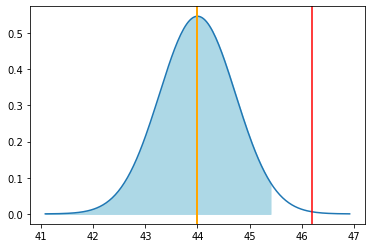

In [6]:
# Gauss-curve plot:
# X-values
dist_x = np.linspace(m0 - 4 * s/np.sqrt(n), m0 + 4 * s/np.sqrt(n), num=201)
# Y-values for the Gauss curve
dist_y = stats.norm.pdf(dist_x, m0, s/np.sqrt(n))
fig, dplot = plt.subplots(1, 1)
# Plot the Gauss-curve
dplot.plot(dist_x, dist_y)
# Show the hypothetical population mean with an orange line
dplot.axvline(m0, color="orange", lw=2)
# Show the sample mean with a red line
dplot.axvline(sm, color="red")
# aanvaardingsgebied 
dplot.fill_between(dist_x, 0, dist_y, where=dist_x <= g, color='lightblue')


### Besluit

1. $g \approx 45.4 < x = 46.2$.

    $x$ ligt binnen de kritieke zone dus kunnen we de nulhypothese verwerpen. We kunnen besluiten dat het bindend studieadvies wel degelijk een effect heeft gegeven op de studie-efficientie van de leerlingen.

2. $P(M > 46.2) \approx 0.0013 < \alpha = 0.025$. We verwerpen de nulhypothese omdat de overschrijdingskans kleiner is dan het significantieniveau.

3. $\alpha$ geeft de kans weer van een nulhypothese te verwerpen $H_0$. Er is 2.5% kans dat je een verkeerde conclusie maakt.


## Oefening 2 - Car dealers

Een importeur van auto's is van mening dat het gemiddelde prijsverschil tussen de auto's van twee dealers tussen `hoogstens €300` ligt. Als het verschil hoger ligt dan dat zullen klanten liever naar hun vorige dealer willen gaan.

```
[400, 350, 400, 500, 300, 350, 200,
 500, 200, 250, 250, 500, 350, 100]
```

We hebben hier minder dan 30 waarden én we kennen de standaardafwijking van de sample niet dus gebruiken we de T-test. We bepalen left-tailed of right-tailed door te kijken naar de sample mean. De sample mean (332.14) is hier groter dan het gegeven gemiddelde (300) dus we gaan hier een right-tailed test gaan berekenen. De sample mean ligt aan de rechterkant van het theoretisch gemiddelde. Stel dat de sample mean kleiner was dan 300 dan gingen we gebruik maken van een left-tailed test. Test of er een reden is om te veronderstellen dat het gemiddelde prijsverschil significant `groter is dan €300` met een `significantieniveau van 5%`. 

In [7]:
arr = [400, 350, 400, 500, 300, 350, 200, 500, 200, 250, 250, 500, 350, 100]

n = len(arr)
sm = np.mean(arr)
a = 0.05
m0 = 300
s_sample = np.std(arr, ddof=1)

print(f'Het gemiddelde van de sample is {sm}')

Het gemiddelde van de sample is 332.14285714285717


In [8]:
p = stats.t.sf(sm, loc=m0, scale=s_sample/np.sqrt(n), df=n-1)

if(p < a):
    print('p < a: verwerp de nulhypothese')
else:
    print('p > a: nulhypothese niet verwerpen')

p > a: nulhypothese niet verwerpen


In [9]:
g = stats.t.isf(a, loc=m0, scale=s_sample/np.sqrt(n), df=n-1)
if(sm < g):
    print('sm < g: verwerp de nulhypothese niet')
else:
    print('sm > g: verwerp de nulhypothese')


sm < g: verwerp de nulhypothese niet


Hieronder een alternatieve manier om de $p$ en $g$ waarden te berekenen.

In [10]:
observations = pd.DataFrame(data={
    'pricediff': np.array([400, 350, 400, 500, 300, 350, 200, 500, 200, 250, 250, 500, 350, 100])
})

a = 0.05
n = len(observations)
ss = observations.std()
m0 = 300

t_stat, p = stats.ttest_1samp(observations, popmean=m0, alternative='greater')

g = stats.t.isf(a,loc=m0,scale=observations.std()/np.sqrt(len(observations)), df=n-1)

print("Sample mean        : %.3f" % np.mean(observations))
print("t-score            : %.3f" % t_stat)
print("p-value (2-tailed) : %.5f" % p)
print("p-value (1-tailed) : %.5f" % (p/2))

Sample mean        : 332.143
t-score            : 0.974
p-value (2-tailed) : 0.17381
p-value (1-tailed) : 0.08691


C:\Users\dylan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


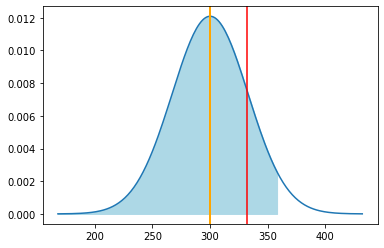

In [11]:
# Gauss-curve plot:
# X-values
dist_x = np.linspace(m0 - 4 * s_sample/np.sqrt(n), m0 + 4 * s_sample/np.sqrt(n), num=201)
# Y-values for the Gauss curve
dist_y = stats.norm.pdf(dist_x, m0, s_sample/np.sqrt(n))
fig, dplot = plt.subplots(1, 1)
# Plot the Gauss-curve
dplot.plot(dist_x, dist_y)
# Show the hypothetical population mean with an orange line
dplot.axvline(m0, color="orange", lw=2)
# Show the sample mean with a red line
dplot.axvline(sm, color="red")
# aanvaardingsgebied 
dplot.fill_between(dist_x, 0, dist_y, where=dist_x <= g, color='lightblue')

### Answers

In this context ($n = 14 < 30$) the $z$-test cannot be used. Instead, we use Student’s $t$-test.

- $x \approx 332.143$
- $s \approx 123.424$
- $g \approx 358.42$. The sample mean is outside of the critical region, so we cannot reject $H_0$.
- $p \approx 0.1738$. $p \nless \alpha$ , so we cannot reject $H_0$. Based on this sample there is no reason to assume that the average price difference on the residual value of old cars is significantly higher than the amount recommended by the importer.

## Exercise 3 - rlanders.csv, revisited

The variable *Money* represents a gross annual salary (×100\\$). We assume this variable has a mean of $\mu = 500$ with standard deviation $\sigma = 98$. If we calculate the sample mean over the entire dataset (do this yourself!), it seems to support our assumptions. But what if we looked at
men and women separately (variable *Gender*)?

First, visualise this case by plotting a kernel density estimate of the variable *Money* over the entire dataset and split up according to *Gender*. Draw a vertical line for the assumed population mean and sample means.

Use an appropriate statistical test to verify the statements below, usinge a significance level of $\alpha = 5\%$. For each statement, calculate the critical value(s) and the $p$-value.

1. The average gross annual salary of men seems higher than the average. Is it also significantly higher?
2. The average gross annual salary of women seems lower. Is it significantly lower?
3. Calculate the region of acceptance for the average gross annual salary for the sample (men and women combined). In this case we want to verify if the sample mean is significantly different from the expected value, but it can be lower or higher.

De sample mean ligt rechts van het gemiddelde dus we berekenen de rechterstaartkans van de $p$-waarde.





### Answers

1. Sample mean: $\overline{x} \approx 507.535$, critical value: $g \approx 511.456$, $p \approx 0.1396$. We can **not** reject the null hypothesis. The gross annual income of men in this sample is not significantly higher than expected.
2. Sample mean: $\overline{x} \approx 472.058$, critical value: $g \approx 477.646$, $p \approx 0.0199$. We can reject the null hypothesis. The gross annual income of women in this sample is significantly lower than expected.
3. The acceptance region is the interval $[487.852, 512.148]$.

In [16]:
# csv-bestand inlezen
rlanders = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/rlanders.csv').set_index(['ID'])

# MANNEN 
n = rlanders[rlanders['Gender'] == 'Male']['Money'].count()
sm = rlanders[rlanders['Gender'] == 'Male']['Money'].mean() # sample mean
s = 98
a = 0.05
m0 = 500

In [21]:
p = stats.norm.sf(sm, loc=m0, scale=s/np.sqrt(n))

print("p-value: %.5f" % p)
if(p < a):
    print("p < a: reject H0")
else:
    print("p > a: do not reject H0")

p-value: 0.13964
p > a: do not reject H0


In [23]:
g = stats.norm.isf(a, loc=m0, scale=s/np.sqrt(n))

print("g-value: %.5f" % g)
if(sm < g):
    print("sm < g: reject H0")
else:
    print("sm > g: do not reject H0")


g-value: 511.45568
sm < g: reject H0


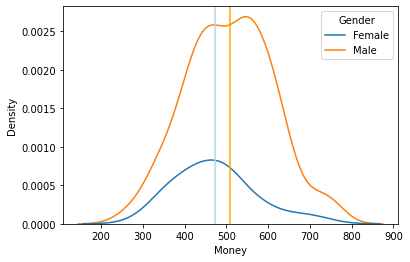

In [18]:
#kernel density estimate plot maken, opsplitsen volgens gender
sns.kdeplot(data=rlanders, x="Money", hue="Gender")

# VISUALISATIE
vrouwen = rlanders[rlanders['Gender'] == 'Female']
mannen = rlanders[rlanders['Gender'] == 'Male']
plt.axvline(vrouwen['Money'].mean(), color='lightblue')
plt.axvline(mannen['Money'].mean(), color='orange')

In [26]:
# csv-bestand inlezen
rlanders = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/rlanders.csv').set_index(['ID'])

# VROUWEN
n = rlanders[rlanders['Gender'] == 'Female']['Money'].count()
sm = rlanders[rlanders['Gender'] == 'Female']['Money'].mean() # sample mean
s = 98
a = 0.05
m0 = 500

sm

472.0576923076923

Bij de vrouwen merken we op dat de `sample mean wél onder het gemiddelde` ligt. Dit betekent dat we hier de linkerstaartkans moeten berekenen vergeleken met de rechterstaartkans van daarnet. Voor de linkerstaartkans te berekenen moet je gebruik maken van de cumulatieve distributiefunctie ofwel `CDF`. Om de $g$-waarde te berekenen moet je hier `1-a` doen. Je moet een omgekeerde $\alpha$ meegeven bij de isf-functie uitvoeren.

In [27]:
p = stats.norm.cdf(sm, loc=m0, scale=s/np.sqrt(n))

print("p-value: %.5f" % p)
if(p < a):
    print("p < a: reject H0")
else:
    print("p > a: do not reject H0")

p-value: 0.01989
p < a: reject H0


In [30]:
g = stats.norm.isf(1-a, loc=m0, scale=s/np.sqrt(n))

print("g-value: %.5f" % g)
if(sm > g):
    print("sm > g: do not reject H0")
else:
    print("sm < g: reject H0")

g-value: 477.64618
sm < g: reject H0


De aanvaardingsregio of theoretische boven- en ondergrens berekenen doe je met de functie `isf`.

In [39]:
a = 0.05
n = rlanders['Money'].count()

g_onder = stats.norm.isf(1-(a/2), loc=m0, scale=s/np.sqrt(n))
g_boven = stats.norm.isf(a/2, loc=m0, scale=s/np.sqrt(n))

print(f'Het aanvaardingsgebied is [{g_onder:.3f},{g_boven:.3f}]')

Het aanvaardingsgebied is [487.852,512.148]
